In [28]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())
print("Shape:", df.shape)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [29]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [30]:
## Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [31]:
## Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [32]:
## Checking categorical columns
print(df.select_dtypes(include='object').columns)

## Encode using One-Hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0  

In [33]:
from sklearn.preprocessing import StandardScaler

## List of numerical columns to scale
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

## create the scaler
scaler = StandardScaler()

## Apply scaling
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [34]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('HeartDisease', axis = 1)
y = df_encoded['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
## Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
## Train and evaluate model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_and_evaluate(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"----{name}----")
    print("Accuracy:", round(acc * 100, 2), "%")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n\n")

In [37]:
## Logistic Regression
log_model = LogisticRegression()
train_and_evaluate(log_model, "Logistic Regression")

## K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, "K-Nearest Neighbors")

## Decision Tree
tree_model = DecisionTreeClassifier()
train_and_evaluate(tree_model, "Decision Tree")

## Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
train_and_evaluate(rf_model, "Random Forest")

## SVM
svm_model = SVC()
train_and_evaluate(svm_model, "Support Vector Machine")


----Logistic Regression----
Accuracy: 85.33 %

Confusion Matrix:
[[67 10]
 [17 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184




----K-Nearest Neighbors----
Accuracy: 82.61 %

Confusion Matrix:
[[61 16]
 [16 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        77
           1       0.85      0.85      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184




----Decision Tree----
Accuracy: 85.33 %

Confusion Matrix:
[[62 15]
 [12 95]]

Classification Report:
              precisio

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



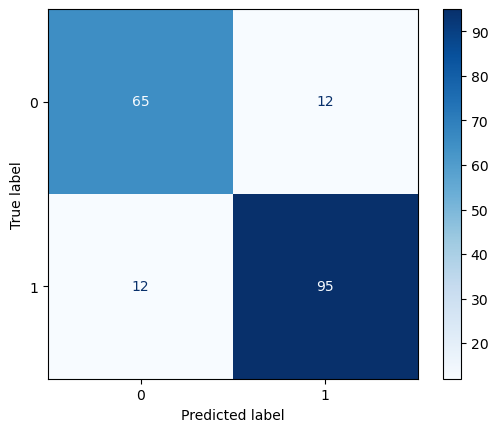

In [38]:
from sklearn.metrics import  classification_report, confusion_matrix, ConfusionMatrixDisplay

#Predict
y_pred = rf_model.predict(x_test)

#Classification Report
print(classification_report(y_test, y_pred))

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

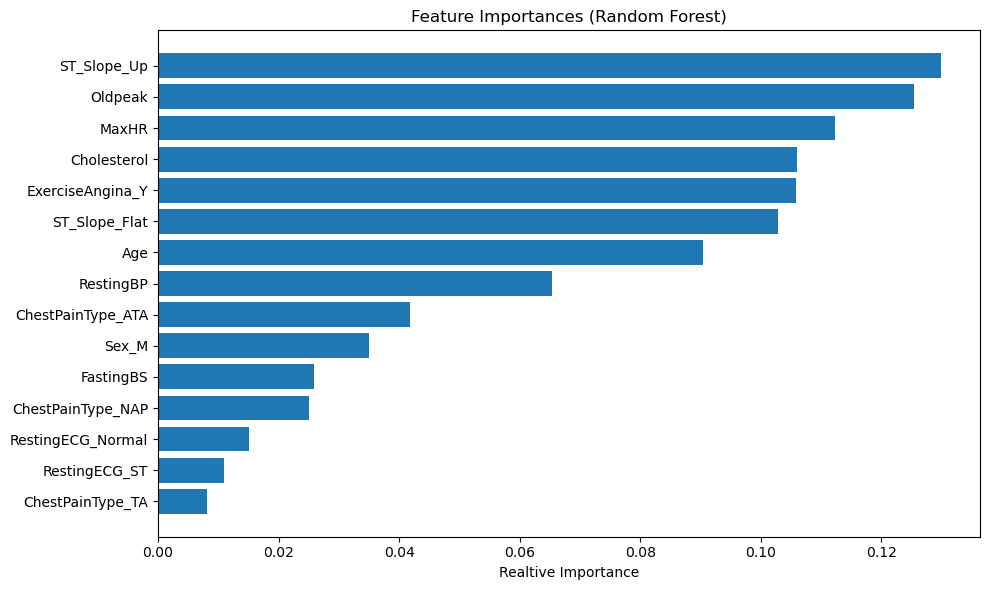

In [41]:
import numpy as np
import matplotlib.pyplot as plt
## Get feature importances
importances = rf_model.feature_importances_
features = x.columns

# Sort
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Realtive Importance")
plt.tight_layout()
plt.show()